# Regression - 1000 Companies
Prediting profit of 1000 companies based on the attributes

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [71]:
#importing the dataset
df = pd.read_csv('1000_Companies.csv')

In [72]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

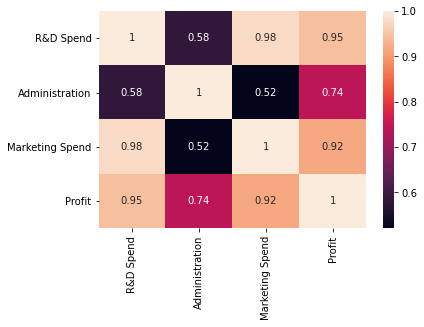

In [73]:
#Data correlation matrix visualization
sns.heatmap(df.corr(), annot=True)

### Using Pandas Get_dummies

In [74]:
df[['California', 'Florida', 'New York']] = pd.get_dummies(df.State)

In [75]:
df = df.drop(['State','New York'], axis=1 )

In [77]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida'],
      dtype='object')

In [82]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend','California', 'Florida']]
y = df['Profit']
x

,R&D Spend,Administration,Marketing Spend,California,Florida
0,165349.20,136897.800,471784.1000,0,0
1,162597.70,151377.590,443898.5300,1,0
2,153441.51,101145.550,407934.5400,0,1
3,144372.41,118671.850,383199.6200,0,0
4,142107.34,91391.770,366168.4200,0,1
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1,0
996,134970.00,130390.080,329204.0228,1,0
997,100275.47,241926.310,227142.8200,1,0
998,128456.23,321652.140,281692.3200,1,0


In [83]:
# creating the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [85]:
y_predict

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667401,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645084,
       118845.03252689,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765883, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532178,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [87]:
#calculating the coefficients
model.coef_

array([ 5.25845857e-01,  8.44390881e-01,  1.07574255e-01,  6.98169073e+02,
       -1.82367525e+02])

In [88]:
# calculating the intercept
model.intercept_

-51733.39879690064

In [90]:
metrics.r2_score(y_test,y_predict)*100

91.12695892268793

R squared value of 91% proves the model is a good model

In [102]:
print('R squared score: {}%'.format(round(metrics.r2_score(y_test,y_predict)*100,2)))

R squared score: 91.13%
